<a href="https://colab.research.google.com/github/raissa-coelho/treinamento-h2ia/blob/main/AlgoritmoGenetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo Genético

O problema da mochila : <br>

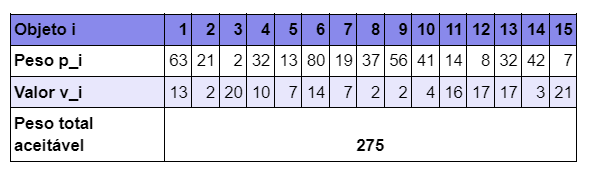

In [4]:
import numpy as np
import random as rd
from random import randint

def fit(peso, valor, populacao, limite):
    fitness = np.empty(populacao.shape[0])
    for i in range(populacao.shape[0]):
        v = np.sum(populacao[i]*valor)
        p = np.sum(populacao[i]*peso)
        if p <= limite:
            fitness[i] = v
        else:
            fitness[i] = 0
    return fitness.astype(int)

def melhores(fitness, pais, populacao):
    fitness = list(fitness)
    p = np.empty((pais, populacao.shape[1]))
    for i in range(pais):
        fit_max = np.where(fitness == np.max(fitness))
        p[i,:] = populacao[fit_max[0][0], :]
        fitness[fit_max[0][0]] = -9999
    return p

def crossover(pais, filhos):
    f = np.empty((filhos, pais.shape[1]))
    ponto_c = int(pais.shape[1]/2)
    rate = 0.7
    i = 0
    while(pais.shape[0] < filhos):
        pai1 = i%pais.shape[0]
        pai2 = (i+1)%pais.shape[0]
        x = rd.random()
        if x > rate:
            continue
        pai1 = i%pais.shape[0]
        pai2 = (i+1)%pais.shape[0]
        f[i, 0:ponto_c] = pais[pai1,0:ponto_c]
        f[i, ponto_c:] = pais[pai2, ponto_c:]
        i+=1
    return f

def mutacao(filhos):
    mudados = np.empty((filhos.shape))
    rate = 0.5
    for i in range(mudados.shape[0]):
        random = rd.random()
        mudados[i,:] = filhos[i,:]
        if random > rate:
            continue
        random2 = randint(0,filhos.shape[1]-1)
        if mudados[i,random2] == 0:
            mudados[i,random2] = 1
        else:
            mudados[i,random2] = 0
    return mudados

def alg(peso, valor, populacao,limite):
    resultado,fitness_total = [], []
    n_pais = 8
    n_filhos = 2
    max_geracao = 100
    
    for i in range(max_geracao):
        fitness = fit(peso,valor,populacao,limite)
        fitness_total.append(fitness)
        pais = melhores(fitness, n_pais, populacao)
        filhos = crossover(pais, n_filhos)
        mutacoes = mutacao(filhos)
        populacao[0:pais.shape[0], :] = pais
        populacao[pais.shape[0]:, :] = mutacoes
    
    ultima_geracao = fit(peso,valor,populacao,limite)
    max_fit = np.where(ultima_geracao == np.max(ultima_geracao))
    resultado.append(populacao[max_fit[0][0], :])
    return resultado


peso = np.array([63,21,2,32,13,80,19,37,56,41,14,8,32,42,7])
valor = np.array([13,2,20,10,7,14,7,2,2,4,16,17,17,3,21])
mochila_max = 275

populacao_inicial = np.random.randint(2, size=(10,15))
print(populacao_inicial)
resultado = alg(peso,valor,populacao_inicial,mochila_max)
print(resultado)

[[0 0 1 0 0 0 0 0 1 0 0 0 0 1 1]
 [1 0 1 1 1 0 1 1 1 0 1 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 1 1 0 1 0 1 1 1 1 1 0]
 [1 0 0 0 1 1 1 1 0 0 1 1 1 0 1]
 [0 0 1 0 0 1 1 1 1 0 0 1 1 1 1]
 [1 0 1 1 1 1 0 1 1 0 1 1 0 0 1]
 [0 0 0 1 1 0 0 0 1 0 1 1 1 0 1]
 [1 0 0 0 0 1 1 0 1 1 0 0 0 1 1]
 [0 1 0 0 1 0 0 1 0 1 0 1 0 0 0]]
[array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])]
